In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print("Extracted")

Extracted


In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

In [18]:
with_mask_files = os.listdir("data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2140.jpg', 'with_mask_1449.jpg', 'with_mask_2626.jpg', 'with_mask_942.jpg', 'with_mask_3538.jpg']
['with_mask_783.jpg', 'with_mask_1336.jpg', 'with_mask_1450.jpg', 'with_mask_2159.jpg', 'with_mask_3247.jpg']


In [19]:
wo_mask_files = os.listdir("data/without_mask")
print(wo_mask_files[0:5])
print(wo_mask_files[-5:])

['without_mask_3593.jpg', 'without_mask_2855.jpg', 'without_mask_1384.jpg', 'without_mask_1390.jpg', 'without_mask_2699.jpg']
['without_mask_2870.jpg', 'without_mask_2858.jpg', 'without_mask_2680.jpg', 'without_mask_1389.jpg', 'without_mask_2694.jpg']


In [20]:
print("With Mask Imgs:", len(with_mask_files))
print("Without Mask Imgs:", len(wo_mask_files))

With Mask Imgs: 3725
Without Mask Imgs: 3828


Creating Labels (w/ mask = 1, w/o mask = 0)

In [21]:
w_mask_labels = [1]*3725
wo_mask_labels = [0]*3828
print(w_mask_labels[0:5], wo_mask_labels[0:5])

[1, 1, 1, 1, 1] [0, 0, 0, 0, 0]


In [22]:
labels_comb = w_mask_labels + wo_mask_labels
print(len(labels_comb))

7553


Display Images

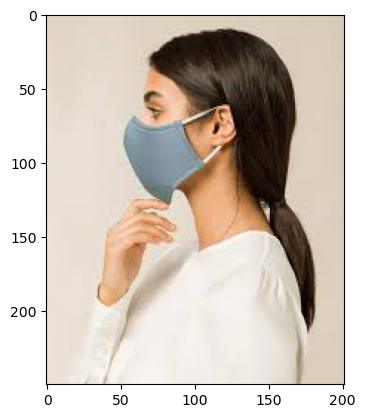

In [23]:
#display with mask image
img = mpimg.imread('data/with_mask/with_mask_2140.jpg')
imgplot = plt.imshow(img)
plt.show()

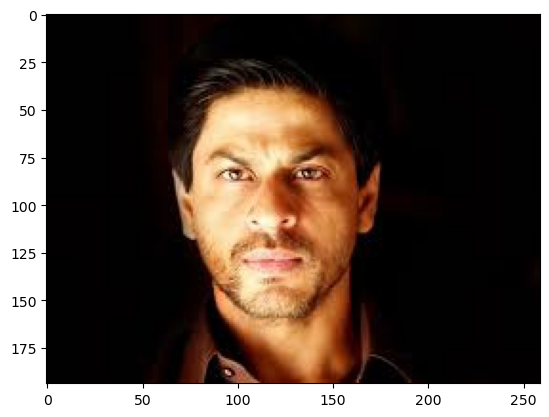

In [24]:
#display w/o mask img
img = mpimg.imread('data/without_mask/without_mask_3593.jpg')
imgplot = plt.imshow(img)
plt.show()

We want to resize the images so they have similar scale, then display them as a np.array (Image Processing)

In [25]:
mask_path = "data/with_mask/"
nomask_path = "data/without_mask/"

data = []

for file in with_mask_files:
    image = Image.open(mask_path+file)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)
    
for file in wo_mask_files:
    image = Image.open(nomask_path+file)
    image = image.resize((128, 128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

/Users/jasonwang/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
print(len(data))

7553


In [27]:
type(data)

list

In [28]:
data[0].shape

(128, 128, 3)

Build Neural Network

In [29]:
#convert img list and label list to np arrays
X = np.array(data)
Y = np.array(labels_comb)


In [30]:
type(X)

numpy.ndarray

In [31]:
type(Y)

numpy.ndarray

In [32]:
X.shape

(7553, 128, 128, 3)

In [33]:
Y.shape

(7553,)

Train/Test Split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [37]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[219, 221, 233],
        [219, 221, 233],
        [218, 220, 232],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[217, 219, 231],
        [217, 219, 231],
        [216, 218, 230],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]],

       [[216, 218, 230],
        [216, 218, 230],
        [215, 217, 229],
        ...,
        [243, 246, 255],
        [243, 246, 255],
        [243, 246, 255]]

In [38]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.85882353, 0.86666667, 0.91372549],
        [0.85882353, 0.86666667, 0.91372549],
        [0.85490196, 0

In [48]:
#Convolutional Neural Network
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [59]:
num_classes = 2
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="sigmoid")
])

In [60]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["acc"])

In [61]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 43s 250ms/step - loss: 0.4537 - acc: 0.8142 - val_loss: 0.3052 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 41s 243ms/step - loss: 0.2857 - acc: 0.8845 - val_loss: 0.2859 - val_acc: 0.8678
Epoch 3/5
170/170 [==============================] - 42s 249ms/step - loss: 0.2300 - acc: 0.9064 - val_loss: 0.2238 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 38s 223ms/step - loss: 0.1907 - acc: 0.9250 - val_loss: 0.2435 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 42s 247ms/step - loss: 0.1667 - acc: 0.9410 - val_loss: 0.2330 - val_acc: 0.9008


Model Eval


In [62]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Acc: ", accuracy)

48/48 [==============================] - 4s 73ms/step - loss: 0.1828 - acc: 0.9279
Acc:  0.9278623461723328


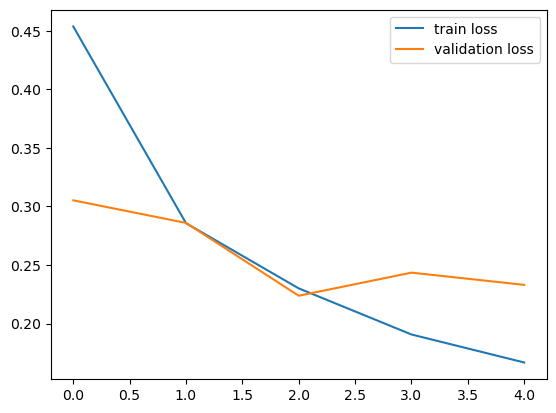

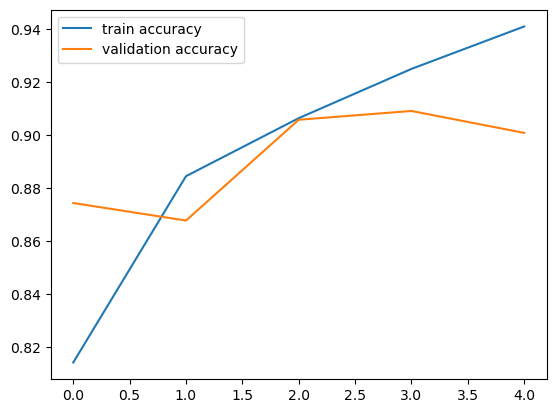

In [63]:
h = history
plt.plot(h.history['loss'], label = "train loss")
plt.plot(h.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

plt.plot(h.history['acc'], label = "train accuracy")
plt.plot(h.history['val_acc'], label = "validation accuracy")
plt.legend()
plt.show()

Prediction

Path: test2.jpeg
1/1 [==============================] - 0s 26ms/step


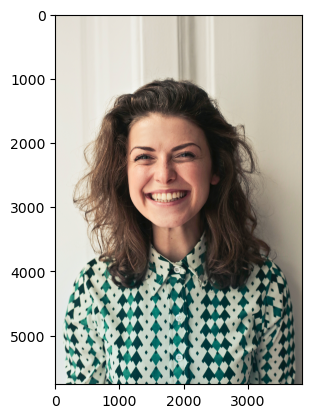

Not wearing mask


In [71]:
input_img_path = input("Path: ")
input_img = Image.open(input_img_path)
input_img_r = input_img.resize((128, 128))
input_img_r = np.array(input_img_r)
input_img_s = input_img_r/255
input_img_reshaped = np.reshape(input_img_s, [1, 128, 128, 3])
input_pred = model.predict(input_img_reshaped)
input_pred_lab = np.argmax(input_pred)
img = mpimg.imread(input_img_path)
imgplot = plt.imshow(img)
plt.show()
print("Wearing mask") if input_pred_lab else print("Not wearing mask")